<a href="https://colab.research.google.com/github/mijiubon/Coursera_Capstone/blob/master/capstone%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project - The Battle of Neighborhoods

## 1. Business Problem

###*Miami, Florida*
Take a number of diverse cultures, add a strong dose of the arts and a splash of ocean water, and you have Miami. Looking at the fantastic art museums and the blossoming gastronomical scene, you might find it hard to believe that just a century ago, this colorful Floridian city was covered in swampland. Once developers rushed into the area, one of the most popular tourist destinations and spectacular city skylines in the country was born. Today, with South Beach before you and the Everglades behind you, you can walk through the bustling streets past historical homes with Spanish words and Caribbean music floating into your ears.

I went there beafore and really like that city(not during covid though, seems little bit dangerous:/). Anyway, Miami still one of the most popular travel destination in the US.

### *Opening of Hotel/Restaurant Shop*
Coming down to business problem, I'm going to discover where will be a good place to open a new hotel/resturanat in Miami.As it is a famous tourist spot, there is already lots of attention towards it. Due to the high competition between tourist industry, people need to locate hotel/resturant in place where more people are attracted and comfortable for a stay and a good meal. Futhermore, considering about the diversity people, I think the recipe of resturant should go with Italian, American, Mexican, and tpyical Cunjun food.

The challenge is to find a suitable location for opening a new hotel / restaurant attracted to all local and foreign people in the centre of all famous venues.

### *Expected / Interested Audience*
The travel type is quite different in Miami. Some people stay for couple of days or more. Also they find some place for hangout or a good meal. Their main focus might be belonging to stay somewhere near to reach venues. Apart from these set of people, students and working professionals are common audience here. So we may need to fascinate them all.



## 2. Data

We will be completely working on *Foursquare* data to explore and try to locate our new hotel where more venues like church, temples, beach, museums, memorials that are present nearby.

We will looking for midpoint area of venues to locate new hotel. Before that our major focus will be on all venues present in and around the core place of Miami.

Just a heads up on how many hotels are distributed now around Miami. We will perform some EDA on hotels & restaurants present in the tourist spot. On furthur notebook we will use Foursquare data to determine other venues as well.



In [194]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

In [195]:
CLIENT_ID = 'GLKPEAKRG1IRIBHMANUNNLW4VJ1RFKIREBROAZJPBG2XOZRJ' 
CLIENT_SECRET = 'QONGTQ44Y4SFPPAW4NVHL1JZMWWZZBPQPHO1EQWBIXW224ZV' 
VERSION = '20210125' 
LIMIT = 300

In [196]:
address = "Miami, Florida"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude   #8.079252 # location.latitude 
longitude =location.longitude #77.5499338 # location.longitude # 

kan='Miami location : {},{}'.format(latitude,longitude)
print(kan)

Miami location : 25.7741728,-80.19362


In [197]:
#Quering for hotel & restaurant

search_query = 'hotel'
search_query_res = 'restaurant'

radius = 300
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_res, radius, LIMIT)
#url

In [198]:
results_hotel = requests.get(url_hotel).json()
results_restaurant = requests.get(url_restaurant).json()
#results_hotel

In [199]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']
venues_restaurant = results_restaurant['response']['venues']

# tranform venues into a dataframe and merging both data
dataframe_hotel = json_normalize(venues_hotel)
dataframe_restaurant = json_normalize(venues_restaurant)

dataframe = pd.concat([dataframe_hotel,dataframe_restaurant])

print("There are {} restaurants and hotels at Miami".format(dataframe.shape[0]))

There are 24 restaurants and hotels at Miami


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


In [200]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
hotels_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]
hotels_df.head()

,name,categories,distance,lat,lng,id
0,Ocean Surf Blue Hotel,Hotel,11,25.774266,-80.193659,4bd75eb9304fce724e7733ab
1,Boutique Indian Hotel Miami,Boutique,37,25.774291,-80.193274,4bd0f90320cd99604d982e9e
2,The Langford Hotel,Hotel,224,25.773547,-80.191493,4f625e57e4b0ed0158428683
3,Miami Sun Hotel,Hotel,287,25.776442,-80.192250,4baa8a85f964a52002733ae3
4,Courtyard by Marriott,Hotel,371,25.772256,-80.190587,4bd5ba5d9649ce720c94511d


In [201]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Miami

# add a red circle marker to represent the core location of Miami
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Miami',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)

# display map
hotels_map

## 3.Methodology section
In this sections we will perform some data analysis and EDA to find insight from data.We will try to understand the current stats of all given data.Probably,clustering or centroid of all venues will help us to locate new hotel.

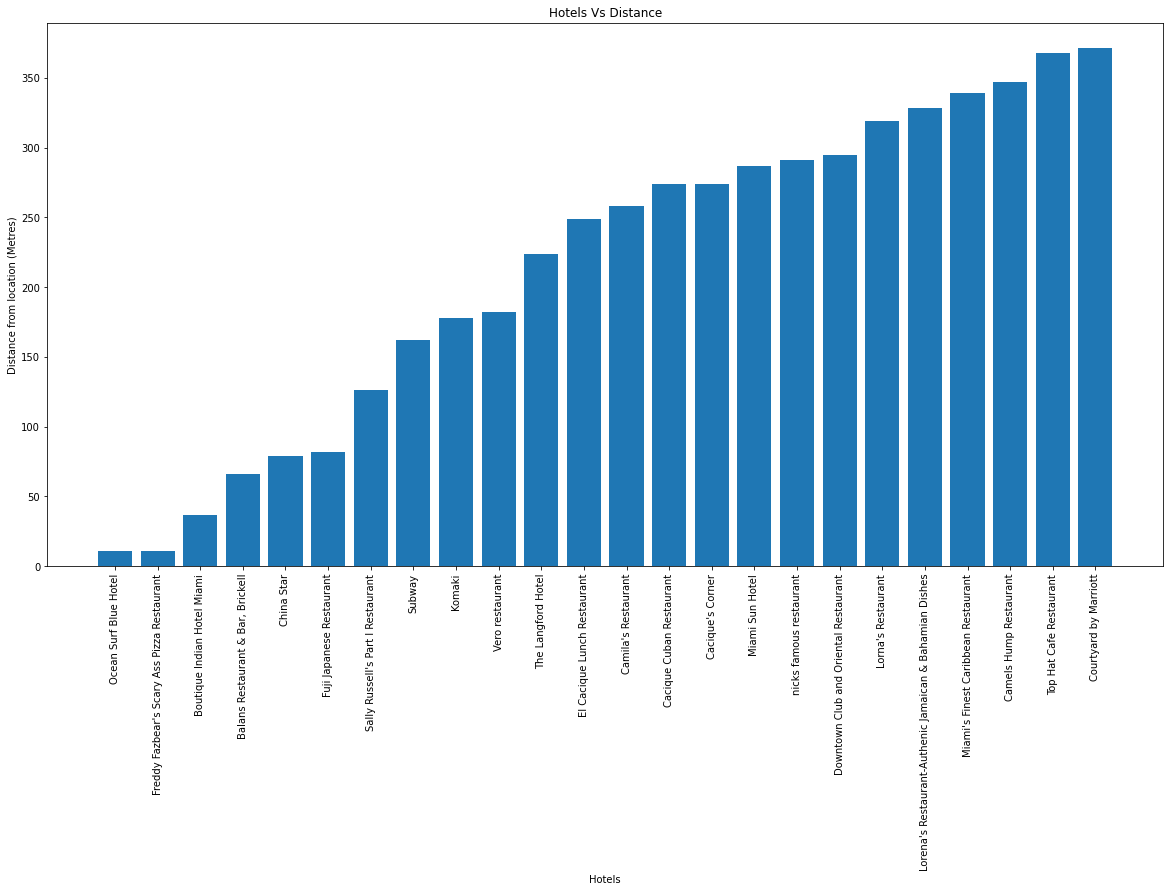

Average distance between hotels and core location is 214 metres


In [202]:
distance_hotel_df=dataframe_filtered[['name','categories','distance','lat','lng']].sort_values('distance')
plt.figure(figsize=(20,10))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Hotels Vs Distance')
    plt.show()
plot_bar_x()

print("Average distance between hotels and core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

In [203]:
dataframe_filtered['categories'].unique()

array(['Hotel', 'Boutique', 'Brazilian Restaurant', 'Italian Restaurant',
       'Pizza Place', 'Dutch Restaurant', 'Food',
       'Latin American Restaurant', None, 'American Restaurant',
       'Caribbean Restaurant', 'Cuban Restaurant', 'Greek Restaurant',
       'Coffee Shop', 'Chinese Restaurant', 'Sandwich Place',
       'Sushi Restaurant'], dtype=object)

In [204]:
radius=300
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
#url_venues

In [205]:
import requests

results_venues = requests.get(url_venues).json()
'There are {} venues around Miami.'.format(len(results_venues['response']['groups'][0]['items']))

'There are 18 venues around Miami.'

In [206]:
items_venues = results_venues['response']['groups'][0]['items']

dataframe_venues = json_normalize(items_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

dataframe_filtered_venues.name

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


0                 Le Chat Noir
1      Churchill's Barber Shop
2             Seybold Building
3              Vero restaurant
4                 Steak Brasil
5                 Cane Á Sucre
6          Meraki Greek Bistro
7     PEZ | Cocina de Mariscos
8          Metro Beauty Center
9           The Langford Hotel
10                   Walgreens
11                  Pawnbroker
12             Soya E Pomodoro
13                  PB station
14                    Salad Oz
15                  Station 28
16         Camila's Restaurant
17          Lost Boy Dry Goods
Name: name, dtype: object

In [207]:
# search query function
search_query_list = ['museum','church'] 
radius =500
temp_df=[]
search_df=[]

def search_query_fn():   
    #Loop to run through urls and from json to pandas
    for i in range(len(search_query_list)):
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_list[i], radius, LIMIT)
        
        results=requests.get(url).json()
        venues = results['response']['venues']
        
        #Normalize from json
        dataframe = json_normalize(venues)
        
        #Removing unwanted column headers
        dataframe.columns = [col.split('.')[-1] for col in dataframe.columns]
        temp_df.append(dataframe)
    
    #Loop to append dataframes to single dataframe
    for j in range(len(search_query_list)):
        data=temp_df[j]
        search_df.append(data)

In [208]:
search_query_fn()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


In [209]:
# Function to run loop over queries
#search_query_fn()
search_df = pd.concat(search_df)
#search_df = pd.DataFrame(search_df)
search_df['categories'] = search_df.apply(get_category_type, axis=1)

In [210]:
search_df = pd.DataFrame(search_df[['name','categories','distance','lat','lng','id']])
search_df

,name,categories,distance,lat,lng,id,id
0,Museum Tower,Museum,362,25.773992,-80.197235,4b6854dbf964a5201b722be3,NaN
1,Gym @ Museum Tower,Gym,350,25.773623,-80.197067,4e4be285b0fbbc2182b1c7ec,NaN
2,HistoryMiami,Museum,303,25.774827,-80.196559,4b898f83f964a520c44132e3,39686354
0,Gesu Catholic Church,Church,286,25.776067,-80.191692,4bedd206767dc9b6a687d3e9,NaN
1,Gesu Church Senior Community Center,Church,295,25.776146,-80.191650,5107ee5ee4b0804e86d37b70,NaN
2,The Pursuit Christian Church in Courtyard Marr...,Church,364,25.772261,-80.190674,4bd4aa6dcfa7b713b09724da,NaN
3,Churchill's Barber Shop,Salon / Barbershop,103,25.773254,-80.193432,4b69c666f964a52076b32be3,38590948
4,Church's Chicken,Fried Chicken Joint,533,25.769519,-80.192353,4eb80b27469073bbc73d87e2,NaN


In [211]:
search_df.drop(search_df.columns[len(search_df.columns)-1], axis=1, inplace=True)

In [212]:
# Data extracted from foursquare venues
four_sq_venue=pd.DataFrame(dataframe_filtered_venues[['name','categories','distance','lat','lng','id']])

# Data extracted from search queries
new_venues=pd.DataFrame(search_df)

# Concatenate both dataframe
df_venue=pd.concat([four_sq_venue, new_venues])

In [213]:
to_drop = ['Hotel', 'Restautant','hotel','Resort']
df_venues = df_venue[~df_venue['name'].str.contains('|'.join(to_drop))].reset_index()
print("There are {} venues in Miami".format(df_venues.shape[0]))
df_venues[['name','distance','id']]

There are 25 venues in Miami


,name,distance,id
0,Le Chat Noir,31,527ac973498e765bb78dc03f
1,Churchill's Barber Shop,103,4b69c666f964a52076b32be3
2,Seybold Building,130,4ca7794097c8a1cd68cf7aa5
3,Vero restaurant,182,52ab7e27498ed214345fec49
4,Steak Brasil,218,514b7bb8e4b0476ac82afd55
5,Cane Á Sucre,116,526aa03a11d295569e76aaee
6,Meraki Greek Bistro,195,57d2f255498e3aca32c8b021
7,PEZ | Cocina de Mariscos,68,5b1fc87e35f983002c332ea6
8,Metro Beauty Center,115,4bc73bdb15a7ef3b4ef678da
9,Walgreens,21,4b79f95af964a5203f1d2fe3


In [214]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Miami
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Miami',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        #popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

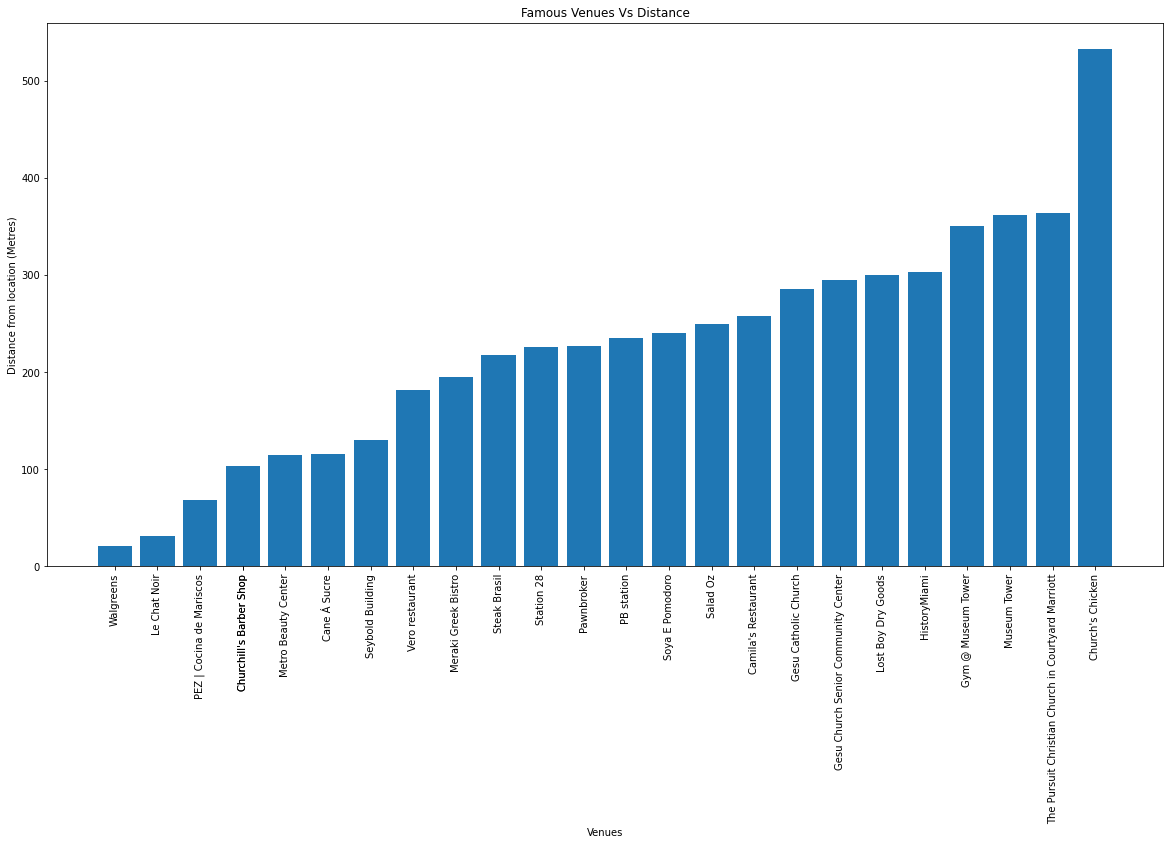

In [215]:
distance_venues_df=df_venues.sort_values('distance')
plt.figure(figsize=(20,10))
def plot_bar_venue():
    # this is for plotting purpose
    index = np.arange(len(distance_venues_df.name))
    plt.bar(distance_venues_df.name, distance_venues_df.distance)
    plt.xlabel('Venues')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_venues_df.name,rotation=90)
    plt.title('Famous Venues Vs Distance')
    plt.show()
plot_bar_venue()

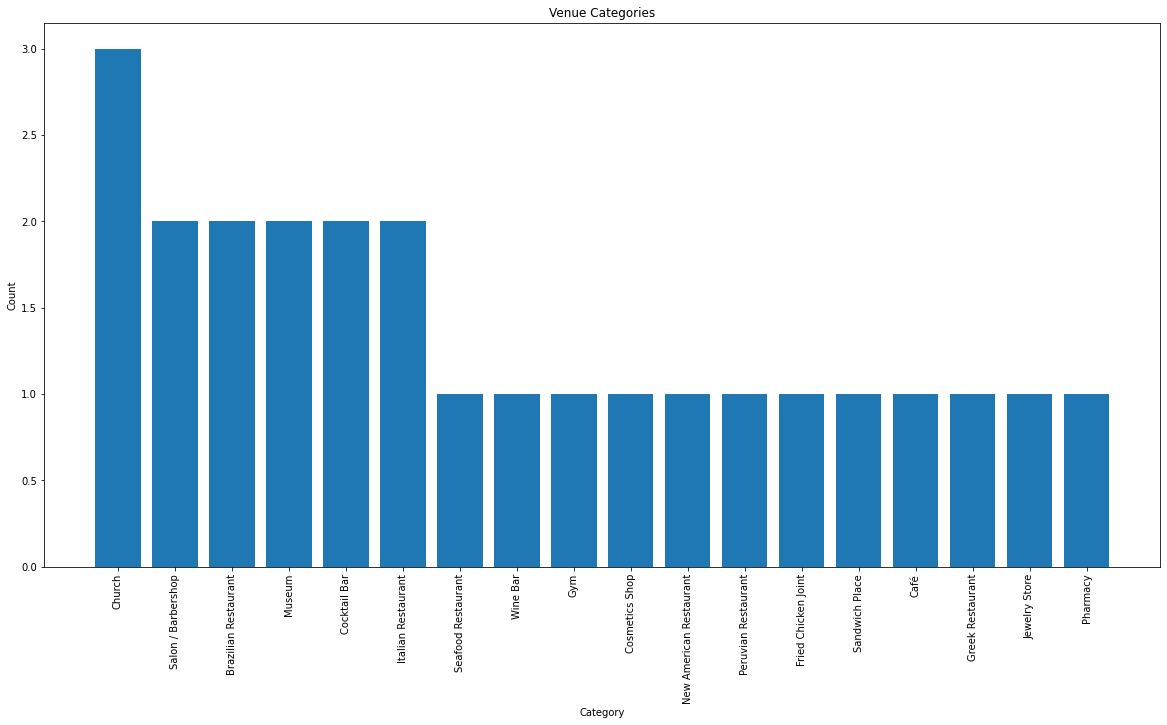

In [216]:
freq_venue=df_venues['categories'].value_counts()
freq_venue=pd.DataFrame(freq_venue).reset_index()
freq_venue.columns=['Category','Count']
freq_venue
plt.figure(figsize=(20,10))
def plot_bar_categ():
    # this is for plotting purpose
    index = np.arange(len(freq_venue.Category))
    plt.bar(freq_venue.Category, freq_venue.Count)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(freq_venue.Category,rotation=90)
    plt.title('Venue Categories')
    plt.show()
plot_bar_categ()

In [217]:
#Rating of venues
rating_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        rating=result['response']['venue']['rating']
        rating_df.append(rating)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        rating='No Rating Yet'
        rating_df.append(rating)

In [218]:
rate_dict = {'Venue': df_venues.name, 'Rating': rating_df,'distance':df_venues.distance}
rate_df=pd.DataFrame(rate_dict)
rate_df

,Venue,Rating,distance
0,Le Chat Noir,No Rating Yet,31
1,Churchill's Barber Shop,No Rating Yet,103
2,Seybold Building,No Rating Yet,130
3,Vero restaurant,No Rating Yet,182
4,Steak Brasil,No Rating Yet,218
5,Cane Á Sucre,No Rating Yet,116
6,Meraki Greek Bistro,No Rating Yet,195
7,PEZ | Cocina de Mariscos,No Rating Yet,68
8,Metro Beauty Center,No Rating Yet,115
9,Walgreens,No Rating Yet,21


In [219]:
result

{'meta': {'code': 400,
  'errorDetail': 'Value nan is invalid for venue id',
  'errorType': 'param_error',
  'requestId': '602309a8f17c6d7685e03661'},
 'response': {}}

In [220]:
rated_list=[]
for i in range(len(rate_df)):
    rated_tip_temp=rate_df['Venue'][i]
    rated_list.append(rated_tip_temp)

#Masking all values present in list
mask = df_venues['name'].isin(rated_list)

final_venues = df_venues[mask]
#final_venues['location']=final_venues['lat'].astype(str).str.cat(final_venues['lng'].astype(str), sep=' - ')
final_venues.reset_index(inplace = True,drop = True) 

final_venues

,index,name,categories,distance,lat,lng,id
0,0,Le Chat Noir,Wine Bar,31,25.773893,-80.193620,527ac973498e765bb78dc03f
1,1,Churchill's Barber Shop,Salon / Barbershop,103,25.773254,-80.193432,4b69c666f964a52076b32be3
2,2,Seybold Building,Jewelry Store,130,25.775122,-80.192854,4ca7794097c8a1cd68cf7aa5
3,3,Vero restaurant,Italian Restaurant,182,25.773247,-80.192117,52ab7e27498ed214345fec49
4,4,Steak Brasil,Brazilian Restaurant,218,25.772831,-80.192034,514b7bb8e4b0476ac82afd55
5,5,Cane Á Sucre,Sandwich Place,116,25.774573,-80.194696,526aa03a11d295569e76aaee
6,6,Meraki Greek Bistro,Greek Restaurant,195,25.772930,-80.192235,57d2f255498e3aca32c8b021
7,7,PEZ | Cocina de Mariscos,Seafood Restaurant,68,25.774007,-80.194277,5b1fc87e35f983002c332ea6
8,8,Metro Beauty Center,Cosmetics Shop,115,25.773166,-80.193334,4bc73bdb15a7ef3b4ef678da
9,10,Walgreens,Pharmacy,21,25.774291,-80.193451,4b79f95af964a5203f1d2fe3


In [221]:
# one hot encoding
neighbor_onehot = pd.get_dummies(final_venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbor_onehot['name'] = final_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot.head()

,name,Brazilian Restaurant,Café,Church,Cocktail Bar,Cosmetics Shop,Fried Chicken Joint,Greek Restaurant,Gym,Italian Restaurant,Jewelry Store,Museum,New American Restaurant,Peruvian Restaurant,Pharmacy,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Wine Bar
0,Le Chat Noir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Churchill's Barber Shop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Seybold Building,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Vero restaurant,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Steak Brasil,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [222]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [223]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']

In [224]:
# Clustering

# set number of clusters
kclusters = 3

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clustersss', kmeans.labels_)

neighbor_merged = final_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [225]:
fin=neighbor_merged.groupby(['Clustersss']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest hotel
venues_lan=sum(final_venues.lat)/len(final_venues.lat)
venues_lng=sum(final_venues.lng)/len(final_venues.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Final location (Green Dot in our below given map) of our brand new hotel:{},{}".format(final_latitude,final_longitude))


Final location (Green Dot in our below given map) of our brand new hotel:25.774016291148655,-80.19259665842785


In [226]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

## Results section
### *My hotel location*
Final location is pointed at 25.774016291148655,-80.19259665842785

Located at exact junction of two cross roads which can give more attention to people who passby.

4.c Spot my hotel against others
Green - My hotel location
Red - Miami core location.
Black - Venues.
Blue - Other hotels.
My predicted location and core location are very close to each other which is expected.As this has central attraction,the predicted one almost matched with the core.

In [227]:
my_hotel_vs_all = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Miami


# add a red circle marker to represent the my hotel location
folium.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My Hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(my_hotel_vs_all)


# add a red circle marker to represent the core location of Miami
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Miami',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(my_hotel_vs_all)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(my_hotel_vs_all)
    
    
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(my_hotel_vs_all)


# display map
my_hotel_vs_all

### *Discussion section*
From above reports,we could get an idea why the predicted one is pointed/clustered on the given spot.First most thing could be the center of attraction for the place.

KMeans have figured out the most common place for all the venues.This output was very adjacent to the core location.This proves the accurate spotting of our predicted algorithm.

Despite of the findings,there were some lack in data.Tips and ratings were missing for most of the venues.Also when I compared foursquare data with google map ,i could see there were many hotels and venues found missing in foursquare.

### *Conclusion section*
As a business person,one would be able to set up a hotel/restaurant on given spot.This will bring revenue automatically as we have located in very near to core one.We proved this with Kmeans.
